In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dorawanie bazy filmów i gatunków:

In [3]:
genres = pd.read_csv('tmdb_genres.csv')
movies = pd.read_csv('tmdb_movies.csv')

Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [4]:
third_quan = movies['vote_count'].quantile(0.75) # obliczam 3 kwantyl dla rozkładu liczby głosów

third_quan1 = movies[movies['vote_count'] > third_quan] # oceniam, które filmy mają vote_count większą od third_quan

third_quan1.sort_values(by='vote_average', ascending=False, inplace=True) # sortuję listę po średniej wartości głosów malejąco

third_quan1[['original_title','vote_average']].head(10) # wyświetlam 1o najwyżej ocenianych filmów 

C:\Users\Marcin\AppData\Local\Temp\ipykernel_9572\2826988273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_quan1.sort_values(by='vote_average', ascending=False, inplace=True) # sortuję listę po średniej wartości głosów malejąco


,original_title,vote_average
1881,The Shawshank Redemption,8.5
3337,The Godfather,8.4
2294,千と千尋の神隠し,8.3
3865,Whiplash,8.3
2731,The Godfather: Part II,8.3
3232,Pulp Fiction,8.3
1818,Schindler's List,8.3
662,Fight Club,8.3
2170,Psycho,8.2
1847,GoodFellas,8.2


Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

C:\Users\Marcin\AppData\Local\Temp\ipykernel_9572\3096081379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_in_10_16['release_date'] = movie_in_10_16['release_date'].dt.year


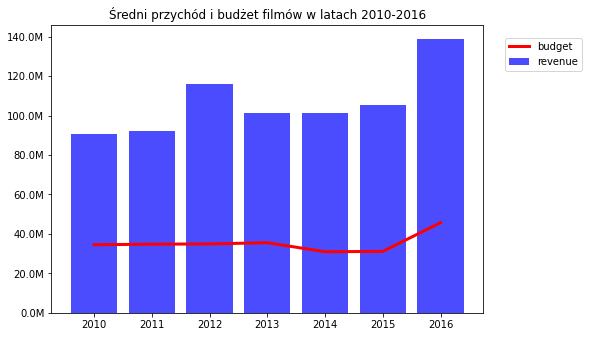

In [5]:
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d') # zmieniam foramt daty,aby móc ją wykorzystać do grupowania

movie_in_10_16 = movies[(movies['release_date'] >= '2010-01-01') & (movies['release_date'] <= '2016-12-31')] #tabela filmów z przedziału 2010-2016



movie_in_10_16['release_date'] = movie_in_10_16['release_date'].dt.year
avg_years = movie_in_10_16.groupby('release_date').mean() #grupujemy tabelę, aby otrzymać średnią wartości w poszczególnych latach (dt.year)

x = avg_years.index # w tabeli t3 indeksem są lata
y = avg_years['budget'] # ustalam y dla wykresu ze średnią budżetu
y2 = avg_years['revenue'] # ustalam y dla wykresu ze średnią przychodu

# tworzę wykres

fig, ax= plt.subplots()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y, color='red', linewidth = 3, label='budget')
axes.bar(x, y2, color='blue', alpha = 0.7, label='revenue')
plt.title('Średni przychód i budżet filmów w latach 2010-2016')

def million(x, pos):  # funkcja zmieniająca opis osi y
    return '{:2.1f}M'.format(x*1e-6)

formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter) # zmieniamy opis osi y

axes.legend(loc=(1.05,0.84))
plt.show()


Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [18]:
genres.rename(columns={'Unnamed: 0': 'genre_id'}, inplace=True)
movies_2 = movies.merge(genres, how='inner', on='genre_id', copy=False)
movies_2[['original_title', 'genres']].head(1)

,original_title,genres
0,Avatar,Action


Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [7]:
counts = movies_2['genres'].value_counts()
counts.loc[counts == counts.max()]

Drama    1207
Name: genres, dtype: int64

Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [15]:
run_time = movies_2.groupby('genres')['runtime'].mean()
run_time.sort_values(ascending=False)

genres
History            133.960000
War                126.125000
Western            117.925926
Drama              115.521559
Adventure          113.061947
Crime              112.143590
TV Movie           110.500000
Action             109.058355
Science Fiction    109.031250
Romance            107.094340
Fantasy            106.487179
Thriller           105.690722
Music              102.852941
Mystery            100.609756
Comedy             100.464491
Horror              94.753333
Documentary         93.511364
Family              89.803571
Animation           89.552846
Foreign             83.000000
Name: runtime, dtype: float64

Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

Text(0, 0.5, 'Liczba filmów w przedziale')

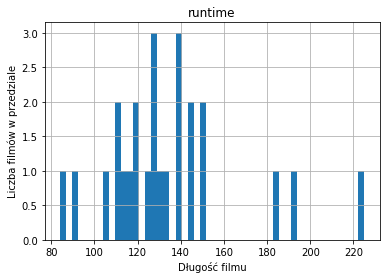

In [47]:
longest_movie = movies_2[movies_2['genres'] == 'History']
longest_movie.hist(column='runtime', bins=50)
plt.xlabel("Długość filmu")
plt.ylabel("Liczba filmów w przedziale")

<AxesSubplot:ylabel='Frequency'>

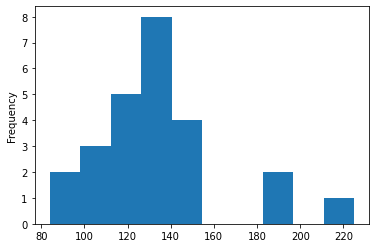

In [38]:
longest_movie['runtime'].plot.hist()